In [1]:
import math
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex

initialization  
$ \newcommand{\E}[1]{\mathbb{E}\left[#1\right]}$  
$ \newcommand{\V}[1]{\mathbb{V}\left[#1\right]}$
$ \newcommand{\EXP}[1]{\exp\left(#1\right)}$  
$ \newcommand{\P}{\mathbb{P}}$
$
\newcommand{\sumnN}{\sum_{n=1}^{N}}
\newcommand{\arrthree}[1]{
\begin{array}{rlr}
#1
\end{array}
}
\newcommand{\mat}[1]{
\left[
\begin{matrix}
#1
\end{matrix}
\right]
}
$
$
\newcommand{\dmc}{\mathcal{D}}
\newcommand{\norm}[1]{\|#1\|}
\newcommand{\normsqr}[1]{\norm{#1}^2}
\newcommand{\frachalf}[1]{\frac{#1}{2}}
$
$
\newcommand{\Ab}{\mathbf{A}}
\newcommand{\Abt}{\Ab^T}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\Ib}{\mathbf{I}}
\newcommand{\Lb}{\mathbf{L}}
\newcommand{\Lbi}{\Lb^{-1}}
\newcommand{\mb}{\mathbf{m}}
\newcommand{\Sb}{\mathbf{S}}
\newcommand{\tb}{\mathbf{t}}
\newcommand{\ub}{\mathbf{u}}
\newcommand{\wb}{\mathbf{w}}
\newcommand{\wbt}{\wb^T}
\newcommand{\xb}{\mathbf{x}}
\newcommand{\yb}{\mathbf{y}}
\newcommand{\mub}{\pmb{\mu}}
\newcommand{\Phib}{\pmb{\Phi}}
$
$
\newcommand{\Nl}[3]{\mathcal{N}\left(#1 \mid #2, #3\right)}
\newcommand{\hx}{h(\xb)}
\newcommand{\yx}{y(\xb; \mathcal{D})}
\newcommand{\ed}[1]{\mathbb{E}_D\left[ #1 \right]}
\newcommand{\edyx}{\ed{\yx}}
\newcommand{\px}{~p(\xb)}
\newcommand{\dx}{~d\xb}
\newcommand{\pxdx}{\px \dx}
\newcommand{\li}{\Lambda^{-1}}
$

**TODO**  
1. Use different basis models for the same problem
1. Compare w/ and w/o regularization
1. Use different regularizers for the same problem
1. Bias Variance Decomposition + Experiments

**Questions**
1. Equation \ref{eq:ptw} under ML and Least Squares
1. Why does Lasso act as a feature selector?


Introduction
=======

Simple Linear Model
------------------

y(\textbf{x},**w**) $ = w_0 + \sum_{i=1}^{D} w_i x_i$ 

where  
**x** $ = (x_1, \cdots, x_D)^T$

Basis Functions
---------------

$
y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{j=1}^{M-1} w_i ~ \phi_j(\mathbf{x})
$ 

* where $\phi_j(\mathbf{x})$ are called basis functions. 
* Total #parameters = M

If $\phi_0(\mathbf{x}) = 1$, then  
$y(\mathbf{x},\mathbf{w})  = \sum_{j=0}^{M-1} w_i ~ \phi_j(\text{x}) = \mathbf{w}^T \phi(\mathbf{x})$ 

* Linear in **w**

Choices of Basis Functions
-------------------------

1. Polynomial Basis
  * $\phi_j(\mathbf{x}) = x^j$
  * Limitation: Global models
  * Cure: Spline Functions: fit different polynomials based on region [EOSL Hastie]
1. Gaussian Basis FUnction:
  * $\phi_j(\mathbf{x}) = \EXP{-\frac{(x-\mu_j)^2}{2s^2}}$
  * Need not be a pdf
1. Sigmoidal
  * $\phi_j(\mathbf{x}) = \sigma \left( \frac{x-\mu_j}{s} \right)$
  * where $\sigma(a) = \frac{1}{1+\EXP{-a}}$ is the logistic sigmoid function
  * Can use $\tanh$, since $\tanh(a) = 2\sigma(2a) - 1$

Loss Functions for Regression
=================

[PRML]1.5.5

Say we fit a function y(x) to give the target variable t. 
Let $\mathcal{L}(t, y(x))$ denote the loss function.

Then, Average or Expected Loss is given by,
$\E{\mathcal{L}} = \iint \mathcal{L}(t, y(x)) ~p(x,t) ~dx ~dt$

If we consider the squared loss function $\mathcal{L}(t, y(\mathbf{x})) = \left( t - y(\mathbf{x})\right)^2$, then,

\begin{array}{llr}
\E{\mathcal{L}} 
&= \iint \left( t - y(\mathbf{x})\right)^2 ~p(\mathbf{x},t) ~d\mathbf{x} ~dt
\\
\dfrac{\partial \E{\mathcal{L}}}{\partial y(\mathbf{x})}
&=
2 \int \left( t - y(\mathbf{x})\right) ~p(\mathbf{x},t) ~dt = 0
\\
\int t ~p(\mathbf{x},t) ~dt  
&=
\int y(\mathbf{x}) ~p(\mathbf{x},t) ~dt = y(\mathbf{x}) \int  ~p(\mathbf{x},t) ~dt
\\
\int t ~p(\mathbf{x},t) ~dt  
&=
y(\mathbf{x}) p(\mathbf{x})
\\
y(\mathbf{x})
&= 
\dfrac{\int t ~p(\mathbf{x},t) ~dt  }{p(\mathbf{x})}
= \int t ~p(t \mid \mathbf{x}) ~dt
\\
y(\mathbf{x}) 
&= \mathbb{E}_t \left[ t \mid \mathbf{x} \right]
\end{array}

$
\color{green}{
  \text{ Thus for a squared loss function, the optimal prediction 
  is given by the conditional mean of the target variable}}
$

Alt. Derivation   

$t = \E{\E{t \mid \mathbf{x}}}$
hence, $\E{\E{t \mid \mathbf{x}} - t}^2 = \V{t \mid \mathbf{x}}$ 

\begin{array}{llr}
\left( y(\mathbf{x}) - t \right)^2
&=
\left( y(\mathbf{x}) - \E{t \mid X} + \E{t \mid \mathbf{x}} - t \right)^2
\\
&=
\left(
    y(\mathbf{x}) - \E{t \mid \mathbf{x}} 
\right)^2 
+
2
\left(
    y(\mathbf{x}) - \E{t \mid \mathbf{x}}
\right)
\left(
    \E{t \mid \mathbf{x}} - t
\right)
+
\left(
    \E{t \mid \mathbf{x}} - t
\right)^2\\
\end{array}

Substituting into $\E{\mathcal{L}}$, the cross term vanishes (the first term of the cross term). Hence  
$$
\E{\mathcal{L}} =
\underbrace{\int
\left(
    y(\mathbf{x}) - \E{t \mid \mathbf{x}} 
\right)^2 ~p(\mathbf{x}) ~d\mathbf{x}
}_{\text{Bias Term}}
-
\underbrace{
\int
\V{t \mid \mathbf{x}} ~p(\mathbf{x}) ~d\mathbf{x}
}_{\text{Variance term}}
$$

ML and Least Squares
===========

Let *t* be given by a deterministic *y* and additive Gaussian noise as,
$t = y(\mathbf{x},\mathbf{w}) + \epsilon$ where $\epsilon \sim \mathcal{N}(0, \beta^{-1})$  
Then,  
<div id='GaussianIidLikelihood'/>
$$
p(t \mid \xb, \wb, \beta) = \mathcal{N}(t \mid y(\xb,\wb), \beta^{-1})
=
\left( \dfrac{\beta}{2\pi} \right)^{1/2}
\exp
\left\{
-\dfrac{\beta}{2} (t - \wbt \phi(\xb))^2
\right\}
\label{eq:ptw}
$$
[?]  

If we assume a squared loss function, optimal t is given by conditional mean of t. In case of a Gaussian, it becomes
$\E{t \mid \mathbf{x}} = \int t ~p(t \mid \mathbf{x}) ~dt = y(\mathbf{x},\mathbf{w})$
Refer: <a href="#Loss-Functions-for-Regression">Loss Functions for Regression</a>

if $\mathbf{x}$ is IID Normal given by $\ref{eq:ptw}$, then  
$$
p(\mathbf{t} \mid \mathbf{X}, \mathbf{w}, \beta)
=
\prod_{n=1}^{N}
\mathcal{N}
    \left(
        t_n \mid \mathbf{w}^T \mathbf{\phi}(\mathbf{x_n}), \beta^{-1}
    \right)
\label{eq:ptiid}
$$

Taking the log likehood, we get  
\begin{array}{ll}
\ln p(\mathbf{t} \mid \mathbf{w}, \beta)
&=
\frac{N}{2} \ln \beta
-
\frac{N}{2} \ln(2\pi)
-
\frac{\beta}{2}
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2
\end{array}

Parameter Estimation
-------------------
Grad of the log likehood (wrt $\mathbf{w}$) gives,  
\begin{array}{ll}
\nabla \ln p(\mathbf{t} | \mathbf{w}, \beta)
&=
\beta
\sum_{n=1}^{N}
(t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)) \mathbf{\phi}(\mathbf{x}_n)^T
= 0
\\
\sum_{n=1}^{N}
t_n \mathbf{\phi}(\mathbf{x}_n)^T
-
\mathbf{w}^T 
\sum_{n=1}^{N}
\mathbf{\phi}(\mathbf{x}_n) \mathbf{\phi}(\mathbf{x}_n)^T
&= 0
\end{array}

$$
\mathbf{\phi}
=
\left[
    \begin{matrix}
        \phi_1\\
        \phi_2\\
        \vdots\\
        \phi_{M-1}
    \end{matrix}
\right]
\hspace{5pt}
\mathbf{t}
=
\left[
    \begin{matrix}
        t_1\\
        t_2\\
        \vdots\\
        t_{N}
    \end{matrix}
\right]
\hspace{20pt}
\mathbf{\phi} \mathbf{\phi}^T
=
\left[
\begin{matrix}
\phi_0 \phi_0 & \phi_0 \phi_1 & \cdots & \phi_0 \phi_{M-1}\\
\phi_1 \phi_0 & \phi_1 \phi_1 & \cdots & \phi_1 \phi_{M-1}\\
\vdots        & \vdots        & \ddots       & \vdots\\
\phi_{M-1} \phi_0 & \phi_{M-1} \phi_1 & \cdots & \phi_{M-1} \phi_{M-1}\\
\end{matrix}
\right]
$$

If we let
$$
\Phi(\mathbf{X})
=
\left[
\begin{matrix}
\phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_{M-1}(x_1)\\
\phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_{M-1}(x_2)\\
\vdots      & \vdots      & \ddots & \vdots\\
\phi_0(x_N) & \phi_1(x_N) & \cdots & \phi_{M-1}(x_N)\\
\end{matrix}
\right]
$$

$$
\sum_{n=1}^{N}
\mathbf{\phi}(\mathbf{x}_n) ~ \mathbf{\phi}(\mathbf{x}_n)^T
=
\Phi(\mathbf{X})^T \Phi(\mathbf{X})
\\
\sum_{n=1}^{N}
t_n \mathbf{\phi}(\mathbf{x}_n)
=
\Phi(\mathbf{X})^T \mathbf{t}
$$

Hence
$
\mathbf{w}_{ML} = \left(\Phi^T \Phi \right)^{-1} \Phi^T \mathbf{t}
$
which is called *normal equations* for least squares.  
$\Phi$ is called the *design matrix* which is $N \times M$ matrix.  
Each row of $\Phi$ is a feature vector transposed $\phi(x_n)$

Bias Parameter
---------------

Now, consider the last term and seperate out the bias parameter
$\frac{\beta}{2}
\sum_{n=1}^{N}
\left(
    t_n - w_0 - \sum_{m=1}^{M-1} w_m \phi_m(\mathbf{x}_n)
\right)^2$  
Diff wrt $w_0$ and equating it to zero, we get  

\begin{array}{ll}
0
&=
\frac{\beta}{2}
\sum_{n=1}^{N}
2(t_n - w_0 - \sum_{m=1}^{M-1} w_m \phi_m(\mathbf{x}_n))
\\
N w_0
&=
\sum_{n=1}^{N}
t_n
-
\sum_{n=1}^{N}
\sum_{m=1}^{M-1}
w_m \phi_m(\mathbf{x}_n)
\\
N w_0
&=
\sum_{n=1}^{N}
t_n
-
\sum_{m=1}^{M-1}
w_m 
\sum_{n=1}^{N}
\phi_m(\mathbf{x}_n)
\\
w_0
&=
\overline{t}_n
-
\sum_{m=1}^{M-1}
w_m
\overline{\phi}_m
\\
\text{where}
\\
\overline{t}_n &= \frac{1}{N} \sum_{n=1}^{N} t_n \\
\overline{\phi}_m &= \frac{1}{N} \sum_{n=1}^{N} \phi_m(\mathbf{x}_n) \\
\end{array}



Thus the basis $w_0$ compensates for the difference between the average of target values
and
the weighted sum of the average of the basis functions

Model parameter
--------------

Diff log likelihood wrt $\beta$ and equating it to zero, we get  
\begin{array}{ll}
0
&=
\frac{N}{2}
\frac{1}{\beta}
-
\frac{1}{2}
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2\\
\frac{1}{\beta_{ML}}
&=
\frac{1}{N}
\sum_{n=1}^{N}
\left(
    t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)
\right)^2\\
\end{array}
That is, the inverse of precision is the variance of the target
about the regression function

Sequential Learning
===========

* Stochastic Gradient can be used to find the parameters sequentially.
* Update rule: $\mathbf{w}_{\tau+1} = \mathbf{w}_{\tau} + \eta \nabla E(\mathbf{w})$
* If squared loss function is assumed,  
  $\nabla E_D(\mathbf{w}) = 
  \left( 
      t_n - 
      \mathbf{w}_{\tau}^T \mathbf{\phi}(\mathbf{x}_n)
  \right)
  \mathbf{\phi}(\mathbf{x}_n)$
* Hence, the update rule becomes,  
  $\mathbf{w}_{\tau+1}
  = \mathbf{w}_{\tau}
    + \eta
      \left( 
          t_n - 
          \mathbf{w}_{\tau}^T \mathbf{\phi}(\mathbf{x}_n)
      \right)
      \mathbf{\phi}(\mathbf{x}_n)
  $

Regularization
========

* Form: $E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$

Quadratic Regularization
-----------------------

* $E_W(\mathbf{w}) = \frac{1}{2} \mathbf{w}^T \mathbf{w}$
* Called as *weight decay* since $\mathbf{w}$ decays to zero when $\lambda$ is high
* Called as *Parameter Shrinkage* as well.

* Total Error Function:  
\begin{array}{rlr}
E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})
&=
\frac{1}{2}
\sum_{n=1}^{N}
(t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)) \mathbf{\phi}(\mathbf{x}_n)^T
+
\frac{\lambda}{2} \mathbf{w}^T \mathbf{w}
\\
0
&=
\sum_{n=1}^{N}
t_n \mathbf{\phi}(\mathbf{x}_n)^T
-
\mathbf{w}^T 
\sum_{n=1}^{N}
\mathbf{\phi}(\mathbf{x}_n) \mathbf{\phi}(\mathbf{x}_n)^T
+ \lambda \mathbf{w}^T
& \color{gray}{\text{Diff wrt w}}
\\
0
&=
\mathbf{t}^T \Phi - \mathbf{w}^T \Phi^T \Phi + \lambda \mathbf{w}^T
\\
\left( \Phi^T \Phi - \lambda \mathcal{I} \right) \mathbf{w} 
&=
\Phi^T \mathbf{t}
\\
\mathbf{w}
&= 
\left( 
    \Phi^T \Phi - \lambda \mathcal{I}
\right)^{-1} 
\Phi^T \mathbf{t}
\end{array}

Generalized Regularizer
---------------------
* $\frac{\lambda}{2} \sum_{m=0}^{M-1} \left| \mathbf{w_j} \right|^q$
* Allows complex models to be fit on smaller data sets
* The problem of finding the right model complexity transforms to that of finding the right value for $\lambda$

In [1]:
def sign(x):
    return +1 if x>=0 else -1

thetas = np.linspace(0,2*math.pi,10**3)
pts = np.asarray([[math.cos(theta),math.sin(theta)] for theta in thetas])


NameError: name 'np' is not defined

In [3]:
[x for x in [abs(pts[ix,0]-pts[100-1-ix,0])<1e-5 for ix in range(50)] if x is False]

[]

In [2]:
# q=1/2
def show_regularizer(q=0.5):
    ptsq = np.zeros_like(pts)
    for ix in range(math.floor(ptsq.shape[0]/2.)):
        x = pts[ix,0]
        ptsq[ix,0] = ptsq[100-1-ix,0] = x
        y_abs = abs((1 - abs(x)**q)**(1./q))
        ptsq[ix,1] = y_abs
        ptsq[100-1-ix,1] = -y_abs
    plt.plot(ptsq[:,0],ptsq[:,1],'.',label='q='+str(q))
    
def interact_regularizer(q=0.5,offset=0.7,show_all=True):
    qs = [0.5,1.,2.,4.] if show_all else [q]
    [show_regularizer(qq) for qq in qs]
    plt.xlim(plt.xlim()[0]-0.1,plt.xlim()[1]+offset)
    plt.ylim(plt.ylim()[0]-0.1,plt.ylim()[1]+0.1)
    plt.legend()
    plt.title('Contours of Reqularizion function')
    plt.show()
    
interact(interact_regularizer,q=(.5,4,.5),offset=(0,1.,.1))


NameError: name 'interact' is not defined

Lasso
-----

* By setting $q=1$ in the generalized regularizer
* Has a tendency to set some weights to zero, thereby making it a "feature selector"

Multiple Outputs
==========

* Let
  * $\mathbf{y}(\mathbf{x},\mathbf{w})$ be K dimensional
  * W be $M \times K$ matrix of parameters
  * $\mathbf{\phi}(\mathbf{x})$ is M dimensional
  * $\mathbf{t}$ is K dimensional

\begin{array}{rlr}
p(\mathbf{t} \mid \mathbf{x}, \mathbf{W}, \beta)
&=
\mathcal{N}
\left(
\mathbf{t} \mid \mathbf{W}^T \mathbf{\phi}(\mathbf{x}),
\beta^{-1} \mathcal{I} 
\right)
\\
\ln p = 0
&=
\frac{NK}{2} \ln\left(\frac{\beta}{2\pi}\right)
-
\frac{\beta}{2}
\sum_{n=1}^{N}
\left\|
\mathbf{t}_n
-
\mathbf{W}^T \mathbf{\phi}(\mathbf{x})
\right\|^2
&
\color{gray}{\text{See: Multivariate Gaussian}}
\\
\mathbf{W}_{ML}
&=
\left(
\Phi^T \Phi
\right)^{-1}
\Phi^T \mathbf{T}
= 
\Phi^{\dagger} \mathbf{T}
\end{array}
* That is, the same $\Phi^{\dagger}$ can be used for all K output target variables

Bias Variance Decomposition
===============

* Frequentist viewpoint of the model complexity issue
* For a squared loss function, the optimal prediction is given by the conditional expectation h(x),  
  $$h(\xb) = \E{t \mid \xb} = \int t ~p (t \mid \xb) ~dt$$
* The expected square loss can be written as,
$$
\E{\mathcal{L}}
=
\int \left(
    y(\xb) - h(\xb)
\right)^2
~p(\xb) ~d\xb
+
\iint \left(
    h(\xb) - t
\right)^2
~p(\xb, t) ~dx dt
$$

Consider the First term $\left(y(\mathbf{x}) - h(\mathbf{x})\right)^2$.  
$\pm \edyx$, we get  
$$
\left\{\yx - \edyx + \edyx - \hx\right\}^2
\\
\hspace{10pt}=
\left(
    \yx - \edyx
\right)^2
+
\left(
    \edyx - \hx
\right)^2
+
2
\left(\yx - \edyx\right)
\left(\edyx - \hx\right)
$$

Taking the expectation wrt $\mathcal{D}$, the last term vanishes.  
$$
\ed{\left(\yx - \hx\right)^2}
=
\underbrace{\left(
    \ed{\yx - \hx}
\right)^2}_{(\text{bias})^2}
+
\underbrace{
\ed{
 \left(
     \yx - \edyx
 \right)
}}_{\text{variance}}
$$

1. Squared-bias: Deviation of the average prediction from the desired
1. Variation of the individual predictions about the average prediction

Thus,  
\begin{array}{ll}
\text{expected loss} &= (\text{bias})^2 + \text{variance} + \text{noise}\\
&\color{green}{\text{where}}&\\
(\text{bias})^2
&=
\int \left(\edyx - \hx\right)^2 \pxdx
\\
\text{variance}
&=
\int \ed{\left( \yx - \edyx \right)^2} \pxdx
\\
\text{noise}
&=
\iint \left(\hx - t\right)^2 ~p(\xb,t) \dx ~dt
\end{array}

todo: experiments

**Practical Value**  
* Zilch
* we have only a single data set
* If there are large no. of data sets, we can combine them into a single large dataset
* This would reduce the overall level of overfitting for a given model complexity

Bayesian Linear Regression
==========================

Parameter distribution
-----------------------

From <a href='#GaussianIidLikelihood'>Likelihood</a> given by
$$
p(\tb \mid \wb) =
\left(
  \dfrac{\beta}{2\pi}
\right)^{N/2}
\exp
\left\{
  -\dfrac{\beta}{2}
  \sumnN \left( t_n - \wbt \phi\left(\xb_n\right) \right)^2
\right\}
$$

Since the likelihood is exponential of quadratic function of **w**,
the prior is a Gaussian given by
$$
p(\wb)
=
\Nl{\wb}{\mb_0}{\Sb_0}
$$
Now we need to find $p(\wb \mid \tb)$

Few things to remember (<a href='../Gaussian Stuff.ipynb#BayesTheoremForGaussianVariables'>Bayes' Theorem for Gaussian Variables</a>)

Given a marginal Gaussian for **x** and a conditional gaussian for **y** given **x** of the form

$$
\arrthree{
p(\xb) 
&=
\Nl{\xb}{\mub}{\li}
\\
p(\yb \mid \xb)
&=
\Nl{\yb}{\Ab\xb + \bb}{\Lbi}
\\
\color{green}{\text{Marginal }}
p(\yb)
&=
\Nl{\yb}{\Ab\mub+\bb}{\Lbi + \Ab\Lambda^{-1}\Abt}
\\
\color{green}{\text{Conditional }}
p(\xb \mid \yb)
&=
\Nl
{\xb}
{\Sigma \left\{ \Abt\Lb(\yb-\bb) + \Lambda\mub \right\}}
{\Sigma}
\\
\text{where}
\\
\Sigma
&= \left(\Lambda + \Abt\Lb\Ab\right)^{-1}
}
$$

Thus
$$
\arrthree{
\mub  &\equiv \mb_0 \\
\li &\equiv \Sb_0 \\
\Ab &\equiv \Phi \\
\yb &\equiv \tb \\
\Lb &\equiv \beta
}
$$

Thus the posterior is given by
$$
\arrthree{
p(\wb \mid \tb)
&=
\Nl{\wb}{\mb_N}{\Sb_N}
\\
\text{where}
\\
\mb_N
&=
\Sigma \left\{ \Abt\Lb(\yb-\bb) + \Lambda\mub \right\}
&=
\Sb_N \left\{ \Phi^T \beta \tb + \Sb_0^{-1} \mb_0\right\}
\\
&=
\Sb_N \left( \beta \Phi^T \tb + \Sb_0^{-1} \mb_0\right)
\\
\Sb_N^{-1}
&=
\left(\Lambda + \Abt\Lb\Ab\right)
&=
\left(\Sb_0^{-1} + \Phi^T \beta \Phi\right)
\\
&=
\left(\Sb_0^{-1} + \beta \Phi^T \Phi\right)
}
$$

Lets consider the prior as an isotropic Gaussian with precision $\alpha$, such that
<div id='BayesianLinearRegressionPosteriorParameters'/>
$$
\arrthree{
p(\wb \mid \alpha)
&=
\Nl{\wb}{\mathbf{0}}{\alpha^{-1}\Ib}
\\
\text{Thus the posterior} & \text{ parameters becomes}
\\
\mb_N
&=
\Sb_N (\beta \Phib^T \tb)
=
\beta \Sb_N \Phib^T \tb
\\
\Sb_N^{-1} 
&=
\alpha\Ib + \beta \Phib^T \Phib
}
$$
The log of the posterior given by the sum of the log likelihood and log prior, as
$$
\ln p(\wb \mid \tb)
=
-\dfrac{\beta}{2}
\sumnN \left\{ t_n - \wbt \phi(\xb_n)\right\}
-\dfrac{\alpha}{2} \wbt \wb
+ \text{ const}
$$
The max of this posterior wrt **w** is equivalent to 
minimization of the sum-of-the-squares error function
with the addition of the quadratic regularization term,
with $\lambda = \alpha / \beta$

[[-0.31317987]
 [ 0.52563142]]


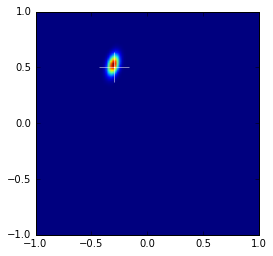

<function __main__.interact_bay_lin_reg>

In [47]:
import matplotlib.ticker as ticker
def fun_f(x, a):
    return a[0] + a[1]*1.*x

def show_gaussian(mean, precision_mat):
    in_pts = 10**2
    x = np.linspace(-1,1,in_pts)
    xv,yv=np.meshgrid(x,x)
    #(2 \pi \beta)^(-1/2)
    coeff =math.sqrt(np.linalg.det(precision_mat)/(2.*math.pi))
    img = np.zeros((in_pts,in_pts))
    for ix in range(in_pts):
        for iy in range(in_pts):
            x = np.matrix([xv[ix,iy],yv[ix,iy]]).transpose()
            # -1/2 * (x-mu)T Precision (x-mu)
            expt = -1./2. * (x - mean).transpose() * precision_mat * (x-mean)
            img[ix,iy] = coeff * math.exp(expt[0,0])
    
    ticks = np.arange(-1,1,1.0)
    extent = (-1,1,-1,1)
    plt.imshow(img, extent=extent, origin='lower')

def show_bay_lin_reg(in_samples,a0,a1,beta_sd,alpha):
    mean_0 = np.matrix([0,0]).transpose()
    xn = np.random.rand(in_samples)*2.0 - 1.0
    fn = fun_f(xn, [a0,a1])
    xn_noise = np.random.normal(0,beta_sd,in_samples)
    # tn = a0 + a1*x + N(0,1/beta)
    tn = np.matrix(fn + xn_noise).reshape(in_samples,1)
    # phi = [ones^T x^T]
    phi = np.matrix(np.vstack([np.ones_like(xn),xn])).transpose()
    # Sn = beta*phi^T*phi + alpha*I
    sn_inv = beta * phi.transpose() * phi + alpha*np.eye(2)
    sn = np.linalg.inv(sn_inv)
    # m_n = beta*Sn*Phi^T*Tn
    mean_n = beta * sn * phi.transpose() * tn
    print(mean_n)
    show_gaussian(mean_n, sn_inv)
    plt.plot(a0,a1,'+w',markersize=30)
    plt.show()
def interact_bay_lin_reg(in_samples=40,
                         a0=-0.3,a1=0.5,
                         beta_sd=0.2,alpha=2.0,
                         show_all=True):
    show_bay_lin_reg(in_samples,a0,a1,beta_sd,alpha)
    
interact(interact_bay_lin_reg,
         in_samples=(1,200),
         a0=(-1,1,0.1),a1=(-1,1,0.1),
         beta_sd=(0,1,0.05),alpha=(1,5,1))

Predictive Distribution
-----------------------

* Usually not interested in the value of **w** itself.
* need to make prediction of *t* for new values of **x**
* Predictive Distribution $
p(t \mid \tb, \alpha, \beta)
=
\int p(t \mid \wb, \beta) p(\wb \mid \tb, \alpha, \beta)
$
* The conditional distribution is given by
$$
p(t \mid \wb, \beta) = \Nl{t}{y(\xb,\wb)}{\beta^{-1}}
$$
* Posterior is given by
$$
\arrthree{
p(\wb \mid \tb)
&=
\Nl{\wb}{\mb_N}{\Sb_N}
\\
\text{where }
\\
\mb_N &= \Sb_N \left( \Sb_0^{-1} \mb_0 + \beta \Phib^T \Phib \right)
\\
\Sb_{N}^{-1} &= \Sb_{0}^{-1} + \beta \Phib^T \Phib
}
$$

Using <a href='../Gaussian Stuff.ipynb#BayesTheoremForGaussianVariables'>Bayes' Theorem for Gaussian Variables</a>, we have the following

Given a marginal Gaussian for **x** and a conditional gaussian for **y** given **x** of the form

$$
\arrthree{
p(\xb) 
&=
\Nl{\xb}{\mub}{\li}
\\
p(\yb \mid \xb)
&=
\Nl{\yb}{\Ab\xb + \bb}{\Lbi}
\\
\color{green}{\text{Marginal }}
p(\yb)
&=
\Nl{\yb}{\Ab\mub+\bb}{\Lbi + \Ab\Lambda^{-1}\Abt}
\\
}
$$

Here
$$
\arrthree{
\xb &\equiv \wb
&
\mub &\equiv \mb_N
&
\li &\equiv \Sb_N
\\
\yb &\equiv t
&
\Abt,\bb &\equiv \Phib,\mathbf{0}
&
\Lbi &\equiv \beta^{-1}
}
$$

Hence
$$
\arrthree{
\E{\yb}
&=
\Ab \mub + \bb = 
\mb_N^T \Phib
\\
\sigma(\yb)
&=
\beta^{-1} + \Phib^T \Sb_N \Phib
}
$$

The second term goes to zero as N increases ([Qazaz][qazaz1997]).

[qazaz1997]: http://dl.acm.org/citation.cfm?id=268081 "Cambridge University Press. Qazaz, C. S., C. K. I. Williams, and C. M. Bishop (1997). An upper bound on the Bayesian error bars for generalized linear regression. In S. W. Ellacott, J. C. Mason, and I. J. Anderson (Eds.), Mathematics of Neural Networks: Models, Algorithms and Applications, pp. 295–299. Kluwer."


If we treat both $\wb, \beta$ as unknown, the predictive distribution becomes a Student't t-distribution (<a href='/notebooks/void-main/Gaussian%20Stuff.ipynb#Unknown-mean,-unknown-variance'>Unknown Mean,Variance</a>)

(100, 100)


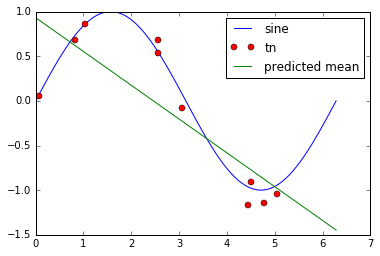

In [76]:
# sample theta from [0,2*pi]
in_samples, in_pts_pred=10,10**2
thetas_sample = np.random.rand(in_samples)*2*math.pi
thetas = np.linspace(0,2*math.pi,in_pts_pred)
plt.plot(thetas, [math.sin(theta) for theta in thetas],label='sine')

# adding noise
beta_sd = 0.2
beta = 1./(beta_sd**2)
xn_noise = np.random.normal(0,beta_sd,in_samples)
tn = [[math.sin(theta) for theta in thetas_sample]+xn_noise]
tn = np.matrix(tn).reshape(in_samples,1)
plt.plot(thetas_sample, tn, 'or',label='tn')

alpha=2.0
phi_posterior = np.matrix(
    np.vstack(
        [np.ones_like(thetas_sample),
         thetas_sample
        ]
    )
).transpose()
# Sn = beta*phi^T*phi + alpha*I
sn_inv = beta * phi_posterior.transpose() * phi_posterior + alpha*np.eye(2)
sn = np.linalg.inv(sn_inv)
# m_n = beta*Sn*Phi^T*Tn
mean_n = beta * sn * phi_posterior.transpose() * tn

phi_pred = np.matrix(
    np.vstack(
        [np.ones_like(thetas), thetas]))
mean_pred = mean_n.transpose() * phi_pred
plt.plot(np.matrix(thetas).transpose(), mean_pred.transpose(),label='predicted mean')

covar_pred = 1./beta + phi_pred.transpose()*sn*phi_pred
print(covar_pred.shape)

plt.legend()
plt.show()

Equivalent Kernel
-----------------

* The posterior mean (<a href='#BayesianLinearRegressionPosteriorParameters'>Posterior Mean</a>) is given by $\mb_N = \beta \Sb_N \Phib^T \tb$.
* Sub this into the regression function, we have
$$
\arrthree{
y(\xb, \mb_N)
&=
\mb_N^T \phi(x)
\\
&=
\phi(x) \mb_N^T
\\
&=
\beta \phi(\xb)^T \Sb_N \Phib^T \tb
\\
&=
\beta \phi(\xb)^T \Sb_N
\mat{
\vdots      & \cdots & \vdots \\
\phi(\xb_1) & \cdots & \phi(\xb_N) \\
\vdots      & \cdots & \vdots \\
}
\tb
\\
&=
\sumnN \beta \phi(\xb)^T \Sb_N \phi(\xb_n) t_n
\\
&=
\sumnN k(\xb,\xb_n) t_n
\\
\text{where }\\
k(\xb,\xb^{\prime})
&=
\beta \phi(\xb)^T \Sb_N \phi(\xb_n)
}
$$

* *k* is called *smoother matrix* or the *equivalent kernel*
* *Linear Smoothers*: Makes predictions by taking linear combination of the training set target values
* 

$$
\arrthree{
\sigma[y(\xb),y(\xb^{\prime})]
&=
\sigma[\phi(\xb)^T\wb, \wb^T \phi(\xb^{\prime})]
\\
&=
\phi(\xb)^T \Sb_N \phi(\xb^{\prime})
\\
&=
\beta^{-1} k(\xb, \xb^{\prime})
}
$$
[? How the fuck did you get to that second step]

Evidence Approximation
=======================

* There are two hyperparameters, $\alpha$ and $\beta$
 * $\alpha$: for the prior of $\wb$
 * $\beta$ for the noise of y
 
* Can integrate analytically over **w** or hyperparameters
  * but complete marginalization is analytically intractable
  
* Here, we use an approximation to find the hyperparameters by maximizing marginal likelihood function obtained by first integrating over **w**
* This framework is called
  * empirical Bayes
  * type 2 maximum likelihood
  * generalized maximum likelihood
  * evidence approximation
  
Steps involved
1. use the prior and likelihood forms
1. complete the square to separate out **w**
1. use normalization coefficient of a Gaussian
1. compute the log evidence
1. find $\alpha$ and $\beta$

Predictive distribution:
$$
p(t \mid \tb) = 
\iiint
~p(t \mid \wb, \beta)
~p(\wb \mid \tb, \alpha, \beta)
~p(\alpha, \beta \mid \tb)
~d\wb ~d\alpha ~d\beta
$$

Comments:--

Marginal likelihood:
$$
p(\tb \mid \alpha, \beta) = 
\int
~p(\tb \mid \wb, \alpha, \beta)
~p(\wb \mid \alpha)
~d\wb
$$

* this can be evaluated using the [conditional distribution](/notebooks/void-main/Gaussian%20Stuff.ipynb#Conditional-Gaussian-Distributions) of a gaussian model
* we shall evaluate by completing the integral and making use of the std. form of the normalization coefficient of the gaussian

Conditional likelihood:
$$
p(\tb \mid \wb, \beta) = 
\mathcal{N}(t_n \mid \wbt \phi(\xb_n), \beta^{-1})
=
\frac{N}{2} \ln \beta
-\frac{N}{2} \ln(2\pi)
-\beta E_D(\wb)
$$
where
$$
E_D(\wb) = 
\frac12 \sumnN
\left\{
  t_n - \wbt \phi(\xb_n)
\right\}^2
$$

Prior:
$$
p(\wb \mid \alpha) = 
\mathcal{N}(\wb \mid \mathbf{0}, \alpha^{-1} \mathbf{I})
$$

Hence,
$$
\arrthree{
p(\tb \mid \alpha, \beta) &=
\left(\frac{\beta}{2\pi}\right)^{N/2}
\left(\frac{\alpha}{2\pi}\right)^{M/2}
\int \exp\{-E(\wb)\} ~d\wb
\\
\text{where} \\
E(\wb)
&=
\beta E_D(\wb) + \alpha E_W(\wb)
\\ &=
\beta \normsqr{\tb - \Phi \wb} +
\frac{\alpha}{2} \wbt \wb
}
$$

$$
\arrthree{
E(\wb)
&=
\beta \normsqr{\tb - \Phi \wb} + \frac{\alpha}{2} \wbt \wb
\\ &=
\beta (\tb - \Phi \wb)^T (\tb - \Phi \wb) + \frac{\alpha}{2} \wbt \wb
}
$$

$$
\arrthree{
\beta
\left(
  \tb^T \tb
- \tb^T \Phi \wb
- \wbt \Phi^T \tb
+ \wbt \Phi^T \Phi \wb
\right)
+ \frac{\alpha}{2} \wbt \wb
}
$$

After a lotta shit,
$$
\arrthree{
E(\wb) &=
E(\mb_N) + \frac12 (\wb-\mb_N)^T \Ab (\wb -\mb_N)
\\
\text{where}
\\
\Ab &= \alpha \Ib + \beta \Phi^T \Phi
\\
\mb_N &= \beta \Ab^{-1} |Phi^T \tb
\\
E(\mb_N) &=
\frac{\beta}{2} \normsqr{\tb - \Phi \mb_N} 
+\frac{\alpha}{2} \mb_{N}^{T} \mb_N
}
$$

Hence
$$
\arrthree{
\int &\exp \left\{ -E(\wb) \right\} ~d\wb
\\ &=
\exp\left\{ -E(\mb_N)\right\}
\int \exp
\left\{
  -\frac12 (\wb - \mb_N)^T \Ab (\wb - \mb_N)
\right\}
~d\wb
\\ 
&=
\exp\left\{ -E(\mb_N)\right\}
(2\pi)^{M/2}
\left| \Ab \right|^{-1/2}
}
$$

Hence
$$
\arrthree{
\ln p(\tb \mid \alpha, \beta)
&=
\frachalf{M} \ln \alpha
+ \frachalf{N} \ln \beta
- E(\mb_N)
- \frac12 \ln \left|\Ab\right|
- \frac12 \ln(2\pi)
}
$$

Finding alpha
-------------------------

Consider the eigenvector equation
$$
\left(
  \beta \Phi^T \Phi
\right)
\ub_i
=
\lambda_i \ub_i
$$
Hence the eigenvalues of **A** is $\alpha + \lambda_i$

$$
\arrthree{
\frac{d}{d\alpha} \ln \left| \Ab \right|
&=
\frac{d}{d\alpha} \ln \prod_i \left( \alpha + \lambda_i \right)
\\ &=
\frac{d}{d\alpha} \sum_i \ln \left( \alpha + \lambda_i \right)
\\ &=
\sum_i \frac{1}{\alpha + \lambda_i}
}
$$

Now, diff ln p(**t** | $\alpha,\beta$) wrt $\alpha$
$$
\arrthree{
0 &=
\frac{M}{2\alpha}
- \frac12 \mb_N^T \mb_N
- \frac12 \sum_i \frac{1}{\alpha + \lambda_i}
\\
\alpha \mb_N^T \mb_N
&=
M - \alpha \sum_i \frac{1}{\alpha + \lambda_i}
\\
&=
\sum_i 1
- \sum_i \frac{\alpha}{\alpha + \lambda_i}
\\ &=
\sum_i 1 - \frac{\alpha}{\alpha + \lambda_i}
\\ &=
\sum_i \frac{\lambda_i}{\alpha + \lambda_i}
\\ &=
\gamma
\\ \text{Thus,} \\
\alpha &= \frac{\gamma}{\mb_N^T \mb_N}
}
$$

* This is an implicit solution for $\alpha$
* have to resort to an iterative procedure to find $\alpha$ and $\gamma$

Finding beta
----------------

* Eigenvalues $\lambda_i$ are proportional to $\beta$
* Hence $$d\lambda_i/d\beta = \lambda_i / \beta$$
Hence,
$$
\arrthree{
\frac{d}{d\beta}
&= 
\ln \left| \Ab \right|
\\
&=
\frac{d}{d\beta}
\ln \prod_i (\alpha + \lambda_i)
\\ &=
\frac{d}{d\beta}
\sum_i \ln (\alpha + \lambda_i)
\\ &=
\frac{1}{\beta} \sum_i \frac{\lambda_i}{\lambda_i + \alpha}
\\ &=
\frac{\gamma}{\beta}
}
$$

Now, diff ln p(**t** | $\alpha,\beta$) wrt $\beta$
$$
\arrthree{
0 &=
\frac{N}{2\beta}
-\frac12 \sumnN
\left\{
  t_n - \mb_N^T \phi(x_n)
\right\}^2
- 
\frac{\gamma}{2\beta}
\\
\frac{1}{\beta}
&=
\frac{1}{N-\gamma}
-\frac12 \sumnN
\left\{
  t_n - \mb_N^T \phi(x_n)
\right\}^2
}
$$

Again, this is an implicit solution for $\beta$ and we have to resort to an iterative procedure to find its value.

Thanks and Regards,  
Your soul reaper